In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

In [22]:
covid = pd.read_excel('covid-19.xlsx')
covid.head()

,Country,Total_cases,Total_death,Total_recovered,Active_cases,Serious_critical,Total_Cases/1M_pop,Deaths/1M_pop,Total_Tests,Tests/1M_pop,Population
0,Russia,917884,15617,729411.0,172856.0,2300.0,6289,107.0,32221546,220783,145942457
1,Spain,358843,28617,NaN,NaN,617.0,7675,612.0,7472031,159805,46757092
2,UK,317379,41361,NaN,NaN,73.0,4672,609.0,14320621,210812,67930780
3,Italy,253438,35392,20364.0,14406.0,55.0,4192,585.0,7520610,12441,60450390
4,Germany,224478,9290,202900.0,12288.0,224.0,2678,111.0,8586648,102444,83817831


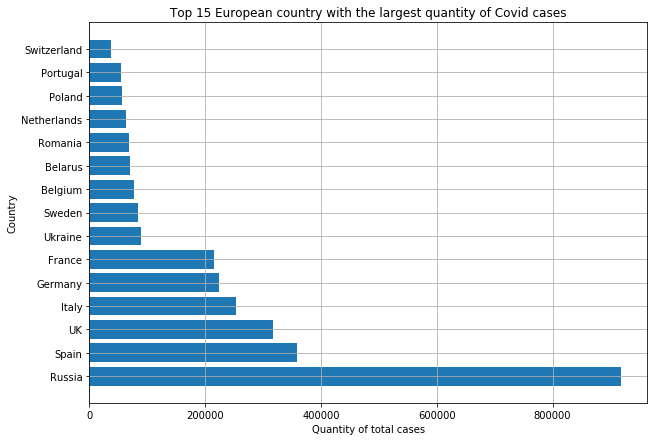

In [23]:
covid_barh = covid.sort_values('Total_cases', ascending=False).head(15)
plt.barh(covid_barh['Country'], covid_barh['Total_cases'])

plt.xlabel('Quantity of total cases')
plt.ylabel('Country')
plt.title('Top 15 European country with the largest quantity of Covid cases')
plt.grid()

Рассматривая график выше, нельзя сказать, почему в этих странах такое количество заболевших: развит бизнес и/или туризм с Китаем (эпицентром начала эпидемии), большое число населения и т.д.
Мы просто можем сделать вывод, что на сегодняшний день, эти страны входят в топ-15 по количеству зафикисированных случаев.

In [19]:
#считаем количество выздоровевших из числа зараженных
def share_of_recovered(row):
    mean_=(row['Total_recovered']/row['Total_cases'])
    return mean_

In [58]:
covid['Share_of_recovered'] = covid.apply(share_of_recovered, axis=1)
covid.sort_values('Share_of_recovered', ascending=False).head(15)

,Country,Total_cases,Total_death,Total_recovered,Active_cases,Serious_critical,Total_Cases/1M_pop,Deaths/1M_pop,Total_Tests,Tests/1M_pop,Population,Share_of_recovered
47,Vatican City,12,0,12.0,0.0,0.0,14981,0.0,0,0,801,1.000000
9,Belarus,69424,607,66747.0,207.0,0.0,7347,64.0,1412589,149497,9448925,0.961440
46,Liechtenstein,91,1,87.0,3.0,0.0,2386,26.0,900,23596,38142,0.956044
40,San Marino,699,42,657.0,0.0,0.0,20595,1237.0,6068,178786,3394,0.939914
36,Iceland,1999,10,1870.0,119.0,1.0,5853,29.0,177586,519987,34152,0.935468
43,Isle of Man,336,24,312.0,0.0,0.0,3949,282.0,9066,106547,85089,0.928571
25,Finland,7720,333,7050.0,337.0,0.0,1393,60.0,460908,83169,5541815,0.913212
44,Gibraltar,209,0,190.0,19.0,0.0,6204,NaN,27046,80279,3369,0.909091
35,Estonia,2184,63,1976.0,145.0,0.0,1646,47.0,133506,100634,1326649,0.904762
4,Germany,224478,9290,202900.0,12288.0,224.0,2678,111.0,8586648,102444,83817831,0.903875


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 1.,  1.,  0.,  1.,  3.,  4.,  8.,  5., 13.,  8.]),
 array([0.08035101, 0.17231591, 0.26428081, 0.35624571, 0.44821061,
        0.54017551, 0.63214041, 0.7241053 , 0.8160702 , 0.9080351 ,
        1.        ]),
 <a list of 10 Patch objects>)

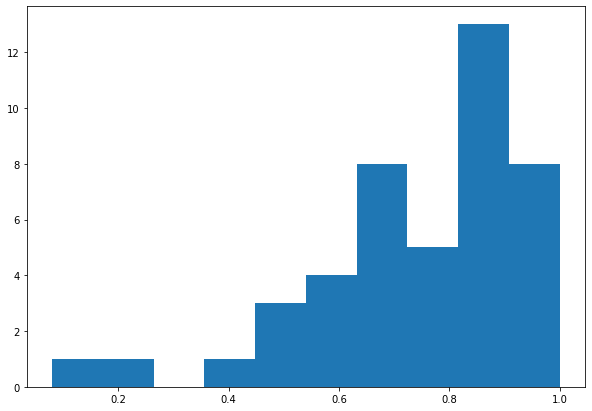

In [54]:
plt.hist(covid['Share_of_recovered'])

In [ ]:
#из гистограммы можно сдлеать вывод о том, что в Европе уже нормализовалась ситуация с ковидом и большинство людей уже 
#выздоровело, хотя лучше бы это смотреть в динамике, так сначала, например, в Испании и в Италии был относительно высокий 
#процент смертности от ковида

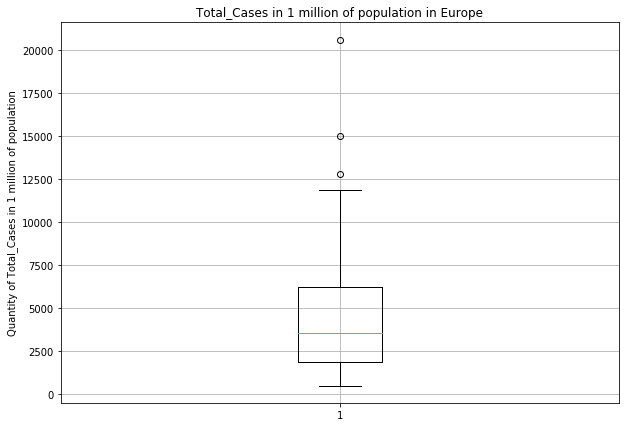

In [64]:
plt.boxplot(covid['Total_Cases/1M_pop'])
plt.ylabel('Quantity of Total_Cases in 1 million of population')
plt.title('Total_Cases in 1 million of population in Europe')
plt.grid()

Из этой диаграммы видно, что в среднем было в Европе было около 3000 случаев на 1 миллион жителей, однако видны такие выбросы, как в Сан Марино, Ватикане, люксембурге и Андорре, связанные с тем, что это очень маленькие по площади государства, число жителдей которых намного меньшще, чем в других европейских странах. Также видим, чо у нас верхний квартиль (75%) с большим размахом - от 6 до 12к

In [30]:
#Данные о новых слуаях ковида в России за неделю с 9 по 16 августа
covid_rus = pd.read_excel('covid_Rus_09.08-16.08.xlsx')
covid_rus

,Date,New_cases,Recovered_in_a_day,Dead_in_a_day
0,2020-08-09,5189,3215,77
1,2020-08-10,5118,3259,70
2,2020-08-11,4945,6494,130
3,2020-08-12,5102,7123,129
4,2020-08-13,5057,6098,124
5,2020-08-14,5065,6568,114
6,2020-08-15,5061,6447,119
7,2020-08-16,4969,3557,68


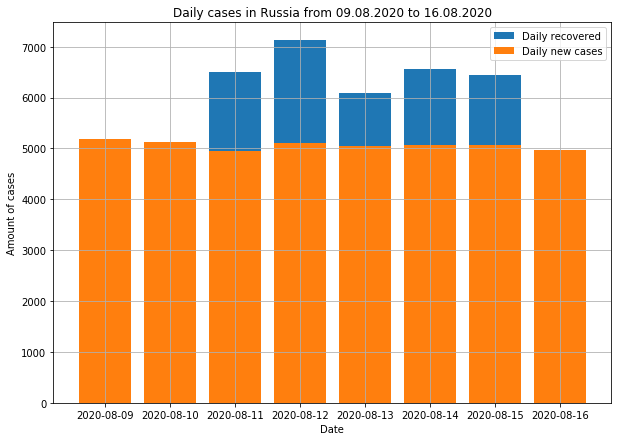

In [63]:
plt.bar(covid_rus['Date'], covid_rus['Recovered_in_a_day'], label='Daily recovered')

plt.bar(covid_rus['Date'], covid_rus['New_cases'], label='Daily new cases')

plt.xlabel('Date')
plt.ylabel('Amount of cases')
plt.title('Daily cases in Russia from 09.08.2020 to 16.08.2020')
plt.grid()
plt.legend()

In [ ]:
#В России число новых случаев в день почти равно числу выздоровывеших, хотя есть несколько дней, когда выздоровевших больше.
#О чем это говорит? 1. Больницы продолжают работать на износ: не успевают выписать выздоровевших, как тут же появляются новые..
#В России еще далеко до закрытия эпидемии, потому число 5000-6000 в день считается высоким показателем.

In [45]:
import seaborn as sns

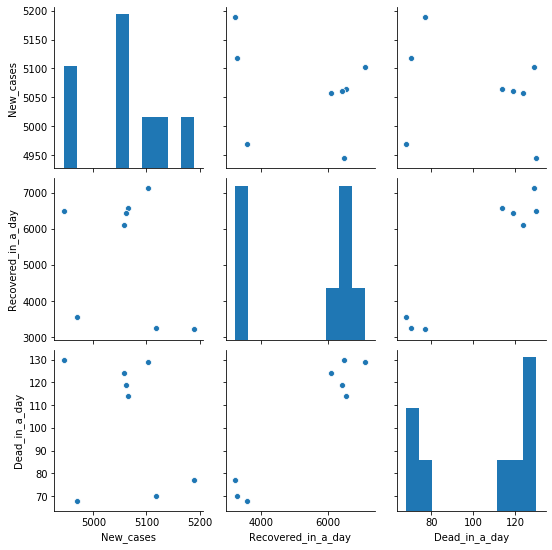

In [39]:
sns_plot = sns.pairplot(
    covid_rus[['New_cases', 'Recovered_in_a_day', 'Dead_in_a_day']])
sns_plot

In [ ]:
#Если честно, то сложно анализировать. По сути, тут нет никакой взаимосвязи, а просто статистические данные.

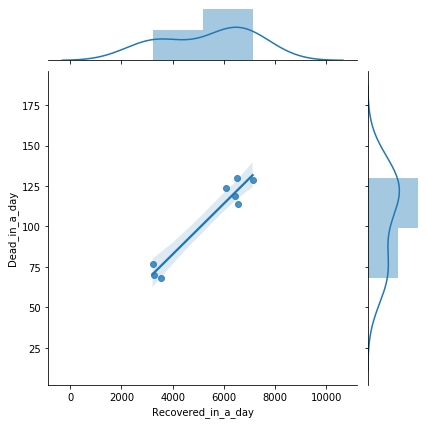

In [41]:
sns.jointplot(x='Recovered_in_a_day', y='Dead_in_a_day', 
              data=covid_rus, kind='reg')

In [ ]:
#Если честно, то сложно анализировать. По сути, тут нет никакой взаимосвязи, а просто статистические данные.

In [48]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

ModuleNotFoundError: No module named 'plotly'

In [ ]:
#Вот здесь прошу помочь разобраться, почему не установилась библиотека...